In [207]:
from IPython.display import display, Math, Latex

# Supervised Learning as a possible solution to RFI Flagging

***Supervised learning*** is one of the main three types of machine learning along with unsupervised learning and reinforcement learning.

Supervised learning involves modelling the relationship between input *X* and outputs *Y*, where *X* can be the features space of a given dataset and *Y* could be some label. The model is determined by showing some machine learning algorithm examples of the input *X* and the corresponding *Y* output for a function: 
$$ F: X → Y$$
so that given an unseen observation $x$, $F(x)$ can confidently predict the corresponding output $y$.

Supervised learning can be further explained through Classification or Regression, were in *classification*, the labels are discrete categories, while in *regression*, the labels are continuous quantities.

In this notebook, I will be presenting the work that I have done investigating whether or not supervised machine learning algorithms can be used to flag RFI

In [ ]:
#Standard utilities
import itertools
import glob
import numpy as np
import pandas as pd

# Supervised Machine learning algorithms used

### k-nearest neighbour classifier

The first algorithm to be mentioned is the k-nearest neighbour classifier, which is **non-parametric** and it is an **instant based** algorithm.

- *Non-parametric* means it makes no explicit assumptions about the functional form of F, avoiding the dangers of mismodeling the underlying distribution of the data.

- *Instance-based* learning means that our algorithm doesn’t explicitly learn a model. Instead, it chooses to memorize the training instances which are subsequently used as “knowledge” for the prediction phase. 



The K-nearest neighbor algorithm essentially boils down to forming a majority vote between the K most similar instances to a given “unseen” observation. Similarity is defined according to a distance metric between two data points. A popular choice is the Euclidean distance given by
$$d(x,x') = \sqrt{(x_{1} - x'_{1})^{2} + (x_{2} - x'_{2})^{2} +...+ (x_{n} - x'_{n})^{2} } $$

but other measures can be more suitable for a given setting and include the Manhattan, Chebyshev and Hamming distance.

More formally, given a positive integer K, an unseen observation x and a similarity metric dd, KNN classifier performs the following two steps:

- It runs through the whole dataset computing dd between $x$ and each training observation. We’ll call the K points in the training data that are closest to $x$ the set X.

- It then estimates the conditional probability for each class, that is, the fraction of points in X with that given class label. 

$$P(y = j|X = x) = \frac{1}{K} \sum_{i → X}I(y^{i} = j) $$

where $I(x)$ is the indicator function which evaluates to 1 when the argument $x$ is true and 0 otherwise.

Finally, our input $x$ gets assigned to the class with the largest probability. An alternate way of understanding KNN is by thinking about it as calculating a decision boundary.



like most machine learning algorithms, the K in KNN is a hyperparameter that you, as a designer, must pick in order to get the best possible fit for the data set. Intuitively, you can think of K as controlling the shape of the decision boundary we talked about earlier.

When K is small, we are restraining the region of a given prediction and forcing our classifier to be “more blind” to the overall distribution. A small value for K provides the most flexible fit, which will have low bias but high variance. Graphically, our decision boundary will be more jagged.

On the other hand, a higher K averages more voters in each prediction and hence is more resilient to outliers. Larger values of K will have smoother decision boundaries which means lower variance but increased bias.



### Naive Bayes Classifier

Naive bayes is a relatively simple probabilistic classfication algorithm that is well suitable for categorical data (probabilities can be compuated as simple ratios) and uses the bayes theorem together with a strong independence assumption. The basic idea behind Naive Bayes is that it assigns a probability to every category (finite outcome variable) based on the features in the data and chooses the outcome that is most likely as its prediction.

The "Naive" in the name refers to the algorithm assuming features in the data are independent conditional on the outcome category. For example in RFI classification, then given a dataset "0 (Clean), 1 (RFI)", Naive Bayes would assume "0", "1" all occur indepedently of each other (that is $P(0, 1|RFI)$ = $P(0|RFI)\times P(1|RFI)$). This conditional independence assumption is considered to be a strong assumption that often doesn't hold in practice, hence the resulting probabilities from Naive Bayes are not to be taken too seriously. However the classifications resulting from Naive Bayes can still be accurate.

In machine learning, common application of Naive Bayes are spam email classification, sentiment analysis, document categorization. Naive bayes is advantageous over other commonly used classification algorithms in its simplicity, speed, and its accuracy on small data sets. Since Naive Bayes needs to be trained on a labeled data set it considered to a supervisd learning algorithm.

Suppose we have a data set where each observation $i$ belongs to a category from the finite set $Y_{i} = \{y_{1i},y_{2i},\ldots, y_{ni}\},$ and consists of several features $X_{i} = \{x_{1i},\ldots,x_{mi}\}.$ If we could find probabilities $P(y_{1i}|X_{i}), P(y_{2i}|X_{i}), \ldots, P(y_{ni}|X_{i}),$ then we could predict the label for observation $i$ to be the one that has the highest probability.

To compute conditional probabilities, we can use the Bayes theorem from statistics which says, 
$$P(y_{ji}|X_{i}) = \frac{P(y_{ji} \text{ and } X_{i})}{P(X_{i})} = \frac{P(X_{i}|y_{ji})P(y_{ji})}{P(X_{i})},$$ 

where $j = 1, 2, \ldots, n.$ Usually $P(X_{i})$ and $P(y_{ji})$ are either well known, or can be estimated easily from the data. However $P(X_{i}|y_{ji})$ is a another conditional probability that we need to find and using Bayes rule again will not help here. This is were the "Naive" part steps in, we assume that the data features $x_{1i}, x_{2i}, \ldots, x_{mi}$ are all independent of each other conditional on knowing the class $y_{ji}.$ Statistically that means 

$$P(X_{i}|y_{ji}) = P(x_{1i}, x_{2i}, \ldots, x_{mi}|y_{ji}) = P(x_{1i}|y_{ji})P(x_{2i}|y_{ji}) \ldots P(x_{mi}|y_{ji}).$$ 

Given this result from the "Naive" assumption of conditional indepdence, we can compute 

$$P(y_{ji}|X_{i}) = \frac{P(X_{i}|y_{ji})P(y_{ji})}{P(X_{i})} = \frac{P(x_{1i}|y_{ji})P(x_{2i}|y_{ji}) \ldots P(x_{mi}|y_{ji})P(y_{ji})}{P(X_{i})}.$$

In many problems we can find $P(x_{li}|y_{ji})$ for $l = 1,\ldots,m$ by using 

$$P(x_{li}|y_{ji}) = \frac{P(x_{li} \text{ and } y_{ji})}{P(y_{ji})}.$$ 

Therefore we can find the probability of each class occuring given features in the data, $P(y_{1i}|X_{i}),P(y_{2i}|X_{i}), \ldots, P(y_{ni}|X_{i}).$ Next we can just compare all of these probabilities to each other, and pick the class that is most likely. Also note that we can omit $P(X_{i})$ in the denominator above because it is common to all the conditional class probabilities and will not effect their rankings, that is if 

\begin{eqnarray}
\frac{P(x_{1i}|y_{1i}) \ldots P(x_{mi}|y_{1i})P(y_{1i})}{P(X_{i})} &\gt& \frac{P(x_{1i}|y_{2i}) \ldots P(x_{mi}|y_{2i})P(y_{2i})}{P(X_{i})} \implies \\
P(x_{1i}|y_{1i}) \ldots P(x_{mi}|y_{1i})P(y_{1i}) &\gt& P(x_{1i}|y_{2i}) \ldots P(x_{mi}|y_{2i})P(y_{2i})
\end{eqnarray}

The Naive Bayes classifier combines this model with a decision rule, this decision rule will decide which hypothesis is most probable, in our example case this will be which class of flower is most probable.
Picking the hypothesis that is most probable is known as the maximum a posteriori or MAP decision rule. The corresponding classifier, a Bayes classifier, is the function that assigns a class label to y as follows:
Since $P(x_{1i}, ..., x_{mi}$) is constant given the input, we can use the following classification rule: 

$$P(y_{ji} \mid x_{1i}, \dots, x_{mi}) \propto P(y_{ji}) \prod_{j=1}^{m} P(x_{ji} \mid y_{ji})$$

$$\Downarrow$$$$\hat{y} = \arg\max_y P(y_{ji}) \prod_{j=1}^{n} P(X_i \mid y_{ji}),$$

and we can use Maximum A Posteriori (MAP) estimation to estimate $P(y_{ji})$ and $P(X_i | y_{ji})$; the former is then the relative frequency of class y in the training set.
There are different naive Bayes classifiers that differ mainly by the assumptions they make regarding the distribution of $P(X_i | y_{ji}$).


### Random Forest Classifier

Decision tree is a supervised learning algorithm. It works for both categorical and continuous input (features) and output (predicted) variables. Tree-based methods partition the feature space into a set of rectangles, and then fit a simple model (like a constant) in each one. They are conceptually simple yet powerful.



In [ ]:
#Machine Learinging Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Preprocessing
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.cross_validation import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import normalize
from sklearn.cross_validation import train_test_split # Data splitting

In [118]:
#Performance Measures
from sklearn.metrics import roy_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


#Feature Selection
from skfeature.function.similarity_based import fisher_score
from skfeature.function.similarity_based import reliefF
from skfeature.function.statistical_based import CFS


#plotting
import seaborn as sns
import matplotlib as mpl
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
sns.set_context('paper',font_scale=2.0)
sns.set_style("whitegrid")
palette = sns.plt.cm.gray_r
# set masked values to plot red
palette.set_bad('r', 1.0)

In [119]:
def roy_plot(classifiers,subplot,model_names):
    #c = ['r','g','b']
    if subplot == True:
        num = len(classifiers)
        sns.plt.figure()
        for i in range(num):
            sns.plt.subplot(1,num,i+1)
            clf = classifiers[i]
            y_roy_fpr, y_roy_tpr, y_roy_thresholds = roy_curve(y_test0, clf[:,1])
            sns.plt.plot(y_roy_fpr, y_roy_tpr,label=model_names[i]+' AUC = %0.2f'% auc(y_roy_fpr, y_roy_tpr))
            sns.plt.legend(loc='lower right')
            sns.plt.plot([0,1],[0,1],'r--')
            sns.plt.xlim([-0.1,1.2])
            sns.plt.ylim([-0.1,1.2])
            sns.plt.ylabel('True Positive Rate')
            sns.plt.xlabel('False Positive Rate')
    if subplot == False:
        num = len(classifiers)
        sns.plt.figure()
        for i in range(num):
            clf = classifiers[i]
            y_roy_fpr, y_roy_tpr, y_roy_thresholds = roy_curve(y_test0, clf[:,1])
            sns.plt.plot(y_roy_fpr, y_roy_tpr,label=model_names[i]+' AUC = %0.2f'% auc(y_roy_fpr, y_roy_tpr))
            sns.plt.legend(loc='lower right')
            sns.plt.plot([0,1],[0,1],'r--')
            sns.plt.xlim([-0.1,1.2])
            sns.plt.ylim([-0.1,1.2])
            sns.plt.ylabel('True Positive Rate')
            sns.plt.xlabel('False Positive Rate')
    return

In [120]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=sns.plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    sns.plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #sns.plt.title(title)
    #sns.plt.colorbar()
    tick_marks = np.arange(len(classes))
    sns.plt.xticks(tick_marks, classes, rotation=45)
    sns.plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            sns.plt.text(j, i, round(cm[i, j],2),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            sns.plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    sns.plt.tight_layout()
    sns.plt.grid(False)
    sns.plt.ylabel('True label')
    sns.plt.xlabel('Predicted label')

In [121]:
def evaluate(model,modelname):
    print('====================================================')
    print('Classification Report for %s'%modelname)
    print('====================================================')
    print(classification_report(y_test0,model,target_names=['Not RFI','RFI']))

    print('\n The model is %f accurate' %(accuracy_score(y_test0,model)*100))
    print('====================================================\n\n')

In [122]:
def report(results,num, n_top=3):
    #n_top = len(results['rank_test_score']) -1
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

## retriving all of the datasets

In [134]:
data_files = shuffle(glob.glob("../HH1333*pks*16*.csv"),random_state=3)
print data_files

['../HH1333134985_pks1613-586.1822.ms_all_data_baseline1and5.csv', '../HH1333305511_pks1613-586.1822.ms_all_data_baseline1and5.csv', '../HH1333305511_pks1613-586.1822.ms_all_data_baseline2and5.csv', '../HH1333134985_pks1613-586.1822.ms_all_data_baseline4and5.csv', '../HH1333134985_pks1613-586.1822.ms_all_data_baseline3and6.csv', '../HH1333305511_pks1613-586.1822.ms_all_data_baseline0and1.csv', '../HH1333305511_pks1613-586.1822.ms_all_data_baseline3and4.csv', '../HH1333305511_pks1613-586.1822.ms_all_data_baseline3and5.csv', '../HH1333134985_pks1613-586.1822.ms_all_data_baseline0and5.csv', '../HH1333305511_pks1613-586.1822.ms_all_data_baseline4and6.csv', '../HH1333305511_pks1613-586.1822.ms_all_data_baseline1and6.csv', '../HH1333305511_pks1613-586.1822.ms_all_data_baseline0and6.csv', '../HH1333134985_pks1613-586.1822.ms_all_data_baseline3and5.csv', '../HH1333134985_pks1613-586.1822.ms_all_data_baseline2and6.csv', '../HH1333305511_pks1613-586.1822.ms_all_data_baseline2and4.csv', '../HH133

In [135]:
#names of the features
names = ["d_p","tC_mean","tp_mean",'t_skew','t_kurtosis','t_cumsumx','t_sumvalues'
         ,'t_slope','t_per25','t_per75','t_var',"fC_mean","fp_mean",'f_skew'
         ,'f_kurtosis','f_cumsumx','f_sumvalues','f_slope','f_per25','f_per75','f_var']
target_names = ['Not RFI','RFI']
#getting feature pairs for plotting
pairs = list(itertools.combinations(names,2))
len(pairs)

210

In [136]:
#selecting datasets to use for Training
datasets = []
for filename in shuffle(data_files[0:3],random_state=4):
    data = pd.DataFrame.from_csv(filename)
    if len(np.where(data["rfi"].values == 1)[0])/float(len(data["rfi"])) < 0.4:
        datasets.append(data)
        print filename
    del data
X0 = pd.concat(datasets, ignore_index=True)
del datasets

../HH1333305511_pks1613-586.1822.ms_all_data_baseline1and5.csv
../HH1333134985_pks1613-586.1822.ms_all_data_baseline1and5.csv
../HH1333305511_pks1613-586.1822.ms_all_data_baseline2and5.csv


In [137]:
X0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324200 entries, 0 to 1324199
Data columns (total 25 columns):
ant1           1324200 non-null int64
ant2           1324200 non-null int64
d_p            1324200 non-null float64
fC_mean        1324200 non-null float64
f_cumsumx      1324200 non-null float64
f_kurtosis     1324200 non-null float64
f_per25        1324200 non-null float64
f_per75        1324200 non-null float64
f_skew         1324200 non-null float64
f_slope        1324200 non-null float64
f_sumvalues    1324200 non-null float64
f_var          1324200 non-null float64
fp_mean        1324200 non-null float64
frequency      1324200 non-null int64
rfi            1324200 non-null int64
tC_mean        1324200 non-null float64
t_cumsumx      1324200 non-null float64
t_kurtosis     1324200 non-null float64
t_per25        1324200 non-null float64
t_per75        1324200 non-null float64
t_skew         1324200 non-null float64
t_slope        1324200 non-null float64
t_sumvalues    

In [138]:
X0.describe()

,ant1,ant2,d_p,fC_mean,f_cumsumx,f_kurtosis,f_per25,f_per75,f_skew,f_slope,...,tC_mean,t_cumsumx,t_kurtosis,t_per25,t_per75,t_skew,t_slope,t_sumvalues,t_var,tp_mean
count,1.324200e+06,1324200.0,1.324200e+06,1.324200e+06,1.324200e+06,1.324200e+06,1.324200e+06,1.324200e+06,1.324200e+06,1.324200e+06,...,1.324200e+06,1.324200e+06,1.324200e+06,1.324200e+06,1.324200e+06,1.324200e+06,1.324200e+06,1.324200e+06,1.324200e+06,1.324200e+06
mean,1.351609e+00,5.0,1.334870e-01,1.413979e-01,1.850930e+00,-4.911379e-01,1.101138e-01,1.495947e-01,8.054649e-02,2.155374e+00,...,1.334870e-01,1.201380e+00,-6.064571e-01,1.133299e-01,1.534593e-01,1.493011e-02,5.350185e-02,1.201380e+00,1.215113e-03,1.334866e-01
std,4.774727e-01,0.0,6.922528e-02,7.545240e-03,5.325574e+00,1.008264e+00,2.518220e-02,2.974869e-02,6.910416e-01,9.295810e+01,...,3.166578e-02,5.376689e-01,7.310572e-01,5.840024e-02,6.500088e-02,5.890406e-01,3.261051e+01,5.376689e-01,2.050275e-02,5.974099e-02
min,1.000000e+00,5.0,1.557574e-04,1.146872e-01,4.562012e-03,-1.930759e+00,7.888255e-05,5.766834e-04,-2.417254e+00,-7.398349e+03,...,9.990521e-02,4.047853e-01,-1.946104e+00,1.392715e-02,5.498555e-02,-2.450163e+00,-2.869940e+02,4.047852e-01,2.100336e-05,4.497614e-02
25%,1.000000e+00,5.0,1.058845e-01,1.367982e-01,1.068843e+00,-1.118665e+00,9.682737e-02,1.354513e-01,-3.516047e-01,-2.079761e+01,...,1.230575e-01,1.067275e+00,-1.128380e+00,9.775183e-02,1.362468e-01,-3.679604e-01,-2.154873e+01,1.067275e+00,6.663712e-04,1.185861e-01
50%,1.000000e+00,5.0,1.312747e-01,1.417204e-01,1.188366e+00,-7.452339e-01,1.110957e-01,1.509150e-01,3.657003e-02,-9.412302e-02,...,1.329834e-01,1.184412e+00,-7.671641e-01,1.116744e-01,1.513477e-01,1.344598e-02,1.083475e-01,1.184412e+00,9.800135e-04,1.316014e-01
75%,2.000000e+00,5.0,1.575559e-01,1.472119e-01,1.315554e+00,-1.970047e-01,1.256000e-01,1.666698e-01,4.393225e-01,2.108464e+01,...,1.405415e-01,1.306141e+00,-2.611110e-01,1.260378e-01,1.669797e-01,3.954022e-01,2.167572e+01,1.306141e+00,1.388606e-03,1.451267e-01
max,2.000000e+00,5.0,7.645745e+00,1.570568e-01,4.904446e+01,4.125003e+00,2.182721e-01,9.274132e-01,2.474874e+00,1.349588e+04,...,1.247802e+00,6.713492e+01,4.116393e+00,7.443395e+00,7.532206e+00,2.471817e+00,3.874175e+02,6.713492e+01,9.800971e+00,7.459435e+00


In [139]:
X0.head()

,ant1,ant2,d_p,fC_mean,f_cumsumx,f_kurtosis,f_per25,f_per75,f_skew,f_slope,...,tC_mean,t_cumsumx,t_kurtosis,t_per25,t_per75,t_skew,t_slope,t_sumvalues,t_var,tp_mean
0,1,5,0.080836,0.124693,38.950191,4.125001,0.000559,0.001358,2.474874,-0.115560,...,0.116443,0.970764,-0.723232,0.082413,0.121821,0.778227,16.813853,0.970764,0.000768,0.107863
1,1,5,0.143090,0.124693,1.020490,-1.589251,0.081635,0.147104,0.155227,-19.563734,...,0.116443,0.970764,-0.723232,0.082413,0.121821,0.778227,16.813853,0.970764,0.000768,0.107863
2,1,5,0.082413,0.125394,40.486519,4.125000,0.000852,0.001276,2.474874,-0.111172,...,0.116443,0.970764,-0.723232,0.082413,0.121821,0.778227,16.813853,0.970764,0.000768,0.107863
3,1,5,0.095210,0.125394,1.062093,0.325011,0.111901,0.127087,-0.751022,-48.614274,...,0.116443,0.970764,-0.723232,0.082413,0.121821,0.778227,16.813853,0.970764,0.000768,0.107863
4,1,5,0.080819,0.125478,40.642002,4.124999,0.000451,0.000751,2.474874,-0.110739,...,0.116443,0.970764,-0.723232,0.082413,0.121821,0.778227,16.813853,0.970764,0.000768,0.107863


In [140]:
print("Following is a breakup of RFI Class. 1 means RFI, 0 means not RFI(clean data).")
print(X0['rfi'].value_counts())

Following is a breakup of RFI Class. 1 means RFI, 0 means not RFI(clean data).
0    1314141
1      10059
Name: rfi, dtype: int64


# Exploratory Data Analysis
###  Histograms of various features by RFI class

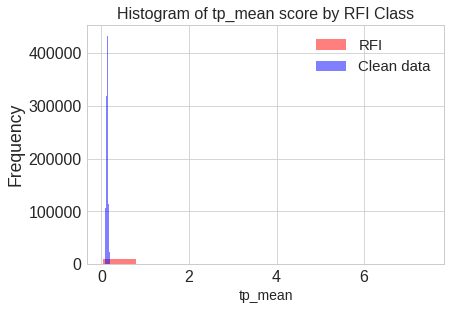

In [141]:
sns.plt.figure()
X0[X0['rfi']==1][names[2]].plot.hist(alpha=0.5,color='red', label='RFI')
X0[X0['rfi']==0][names[2]].plot.hist(alpha=0.5, color='blue', label='Clean data')

sns.plt.legend(fontsize=15)
sns.plt.title ("Histogram of "+str(names[2])+" score by RFI Class", fontsize=16)
sns.plt.xlabel(names[2], fontsize=14)
sns.plt.show()

from the image above one can see that the clean data seem to be concentrated around some small region in the feature space. When it comes to RFI the region in which RFI lies is more spread out around and away from the region of clean data

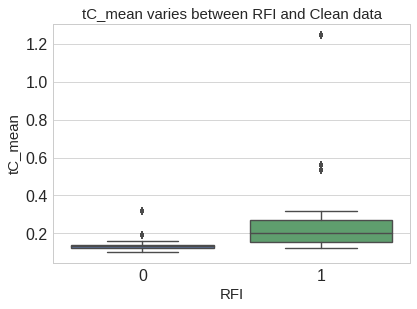

In [142]:
sns.plt.figure()
sns.boxplot(x=X0['rfi'],y=X0[names[1]])
sns.plt.title(str(names[1])+" varies between RFI and Clean data", fontsize=15)
sns.plt.xlabel("RFI",fontsize=15)
sns.plt.ylabel(str(names[1]),fontsize=15)
sns.plt.show()

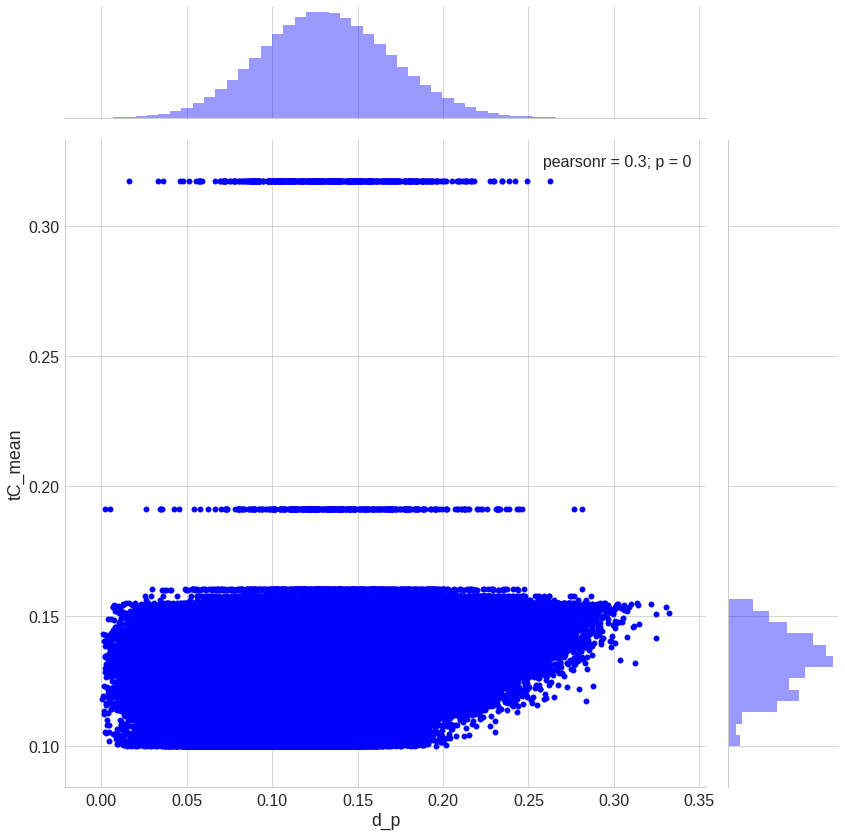

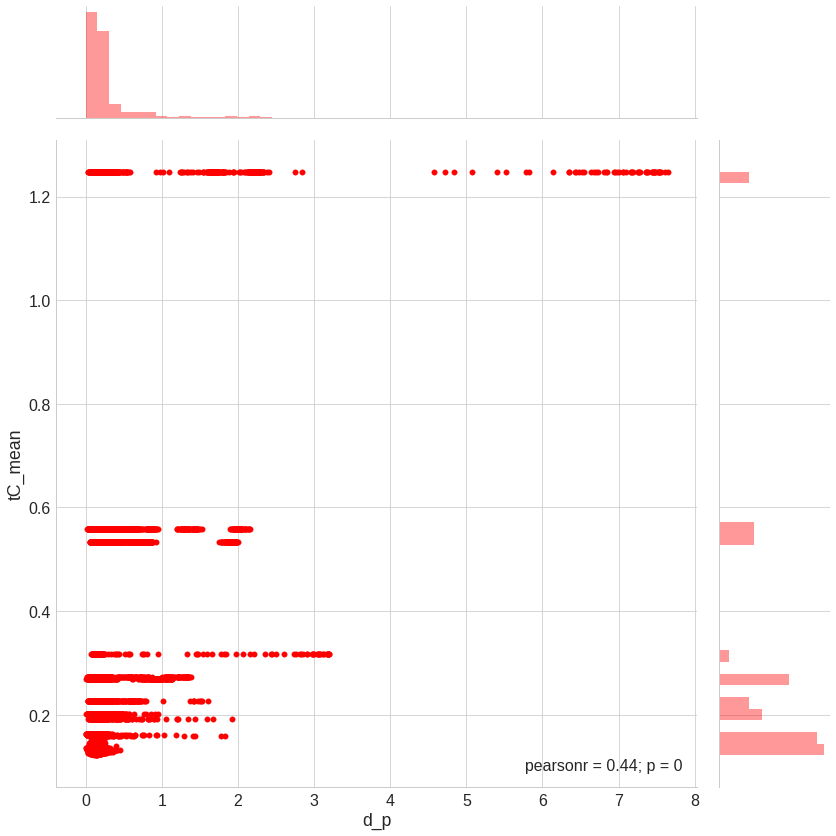

In [143]:
sns.plt.figure()
X1 = X0[X0.rfi==0]
sns.jointplot(x=names[0],y=names[1],data=X1, color='blue', size=12)
X1 = X0[X0.rfi==1]
sns.jointplot(x=names[0],y=names[1],data=X1, color='red', size=12)
del X1
sns.plt.show()

In [144]:
for i in range(10):
    X0= shuffle(X0,random_state=2458)
HH_X0_not = X0[X0["rfi"]==0]
HH_X0_is = X0[X0["rfi"]==1]
X0 = pd.concat([HH_X0_not[:len(HH_X0_is)],HH_X0_is[:]], ignore_index=True)
del HH_X0_not
del HH_X0_is
X0 = shuffle(X0.drop_duplicates())
print len(X0),len(np.unique(X0["d_p"]))

20118 20108


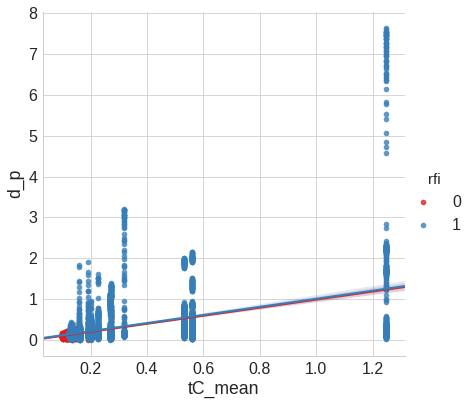

In [145]:
sns.plt.figure(figsize=(14,7))
sns.lmplot(y=names[0],x=names[1],data=X0,hue='rfi',palette='Set1',size=6)
sns.plt.show()

# Overview of entire feature space

In [146]:
#sns.plt.figure()
#sns.set_style("whitegrid")
#sns.pairplot(shuffle(X0)[:], size=3 ,diag_kind="kde",hue="rfi",palette=["b","r"],
#             vars=np.unique(list(itertools.combinations(names,2))[:]),markers=["s","^"],
#             plot_kws=dict(s=100, edgecolor="k", linewidth=1,alpha=0.8,),
#             diag_kws=dict(shade=True))
#sns.plt.show()

# Train Test Split

In [147]:
x_train0, x_test0, y_train0, y_test0 = train_test_split(X0[names]
                                        ,X0['rfi'], test_size=0.30
                                        ,random_state=6)

# KNeighborsClassifier

In [148]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train0,y_train0)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [149]:
pred = knn.predict(x_test0)

[[1828 1164]
 [1432 1612]]


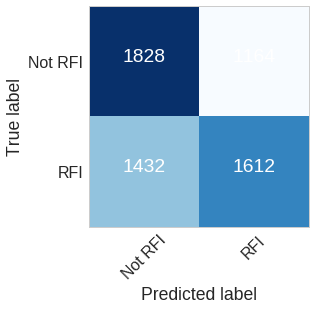

('Misclassification error rate:', 0.43)


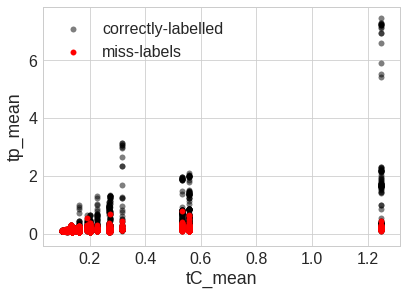

In [150]:
conf_mat=confusion_matrix(y_test0,pred)
print conf_mat
plot_confusion_matrix(conf_mat, classes=target_names,normalize=False)
sns.plt.show()
print("Misclassification error rate:",round(np.mean(pred!=y_test0),3))
sns.plt.figure()
sns.plt.scatter(x_test0[names[1]],x_test0[names[2]],c='k',alpha=0.5,label='correctly-labelled')
sns.plt.scatter(x_test0[names[1]].values[np.where(y_test0!=pred)[0]],x_test0[names[2]].values[np.where(y_test0!=pred)[0]],c='r',label='miss-labels')
sns.plt.xlabel(names[1])
sns.plt.ylabel(names[2])
sns.plt.legend(loc='best')
sns.plt.show()

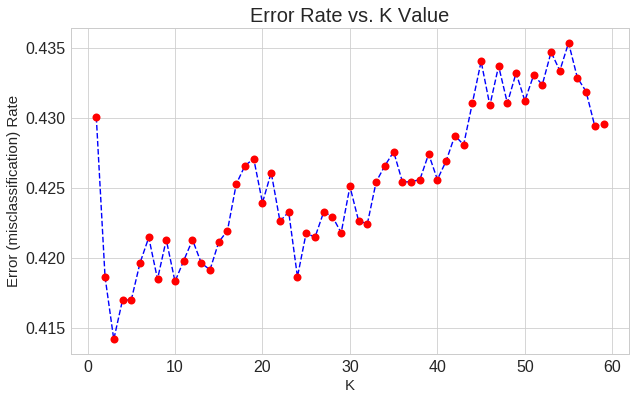

In [151]:
error_rate = []

# Will take some time
for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train0,y_train0)
    pred_i = knn.predict(x_test0)
    error_rate.append(np.mean(pred_i != y_test0))

sns.plt.figure(figsize=(10,6))
sns.plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
sns.plt.title('Error Rate vs. K Value', fontsize=20)
sns.plt.xlabel('K',fontsize=15)
sns.plt.ylabel('Error (misclassification) Rate',fontsize=15)
sns.plt.show()

# Training a Decision Tree Model

In [152]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth=None)
dtree.fit(x_train0,y_train0)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Predictions and Evaluation of Decision Tree
Create predictions from the test set and create a classification report and a confusion matrix.

In [153]:
pred = dtree.predict(x_test0)

[[2934   58]
 [  51 2993]]


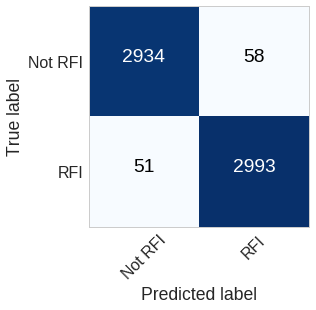

('Misclassification error rate:', 0.018)


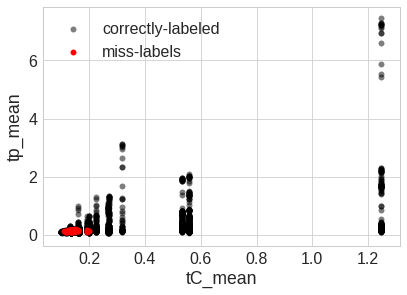

In [154]:
conf_mat=confusion_matrix(y_test0,pred)
print conf_mat
plot_confusion_matrix(conf_mat, classes=target_names,normalize=False)
sns.plt.show()
print("Misclassification error rate:",round(np.mean(pred!=y_test0),3))
sns.plt.figure()
sns.plt.scatter(x_test0[names[1]],x_test0[names[2]],c='k',alpha=0.5,label='correctly-labeled')
sns.plt.scatter(x_test0[names[1]].values[np.where(y_test0!=pred)[0]],x_test0[names[2]].values[np.where(y_test0!=pred)[0]],c='r',label='miss-labels')
sns.plt.xlabel(names[1])
sns.plt.ylabel(names[2])
sns.plt.legend(loc='best')
sns.plt.show()

### Training the Random Forest model
Now its time to train our model!
#### Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.

In [155]:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(x_train0, y_train0)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=600, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [156]:
pred = rfc.predict(x_test0)

[[2950   42]
 [ 234 2810]]


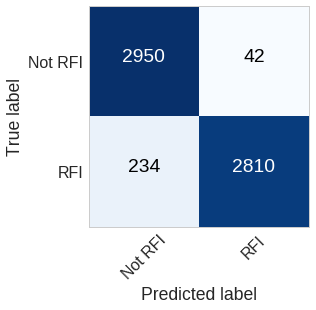

('Misclassification error rate:', 0.046)


In [157]:
conf_mat=confusion_matrix(y_test0,pred)
print conf_mat
plot_confusion_matrix(conf_mat, classes=target_names,normalize=False)
sns.plt.show()
print("Misclassification error rate:",round(np.mean(pred!=y_test0),3))

In [158]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='gini')
    rfc.fit(x_train0, y_train0)
    pred = rfc.predict(x_test0)
    cm = confusion_matrix(y_test0,pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/float(cm.sum())
    ntree[i]=i*5

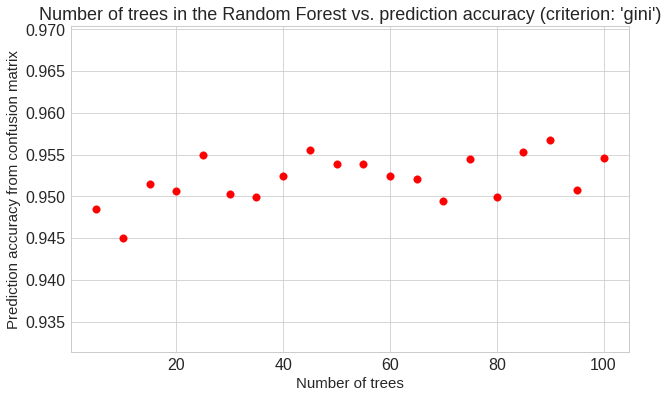

In [159]:
sns.plt.figure(figsize=(10,6))
sns.plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
sns.plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'gini')", fontsize=18)
sns.plt.xlabel("Number of trees", fontsize=15)
sns.plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)
sns.plt.show()

In [160]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='entropy')
    rfc.fit(x_train0, y_train0)
    pred = rfc.predict(x_test0)
    cm = confusion_matrix(y_test0,pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/float(cm.sum())
    ntree[i]=i*5

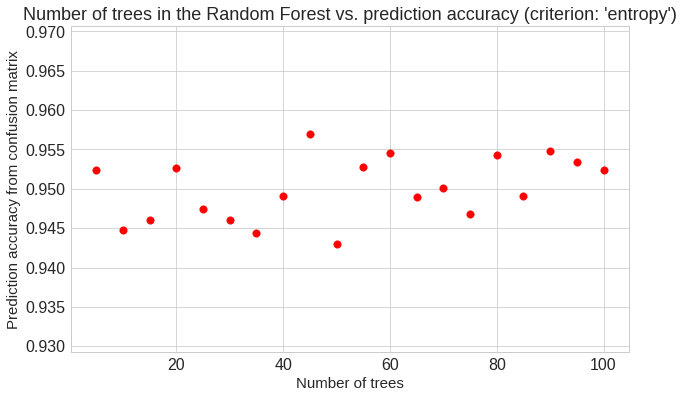

In [161]:
sns.plt.figure(figsize=(10,6))
sns.plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
sns.plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'entropy')", fontsize=18)
sns.plt.xlabel("Number of trees", fontsize=15)
sns.plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)
sns.plt.show()

Fixing max tree depth

In [162]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='gini')
    rfc.fit(x_train0, y_train0)
    pred = rfc.predict(x_test0)
    cm = confusion_matrix(y_test0,pred)
    accuracy[i] = float(cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

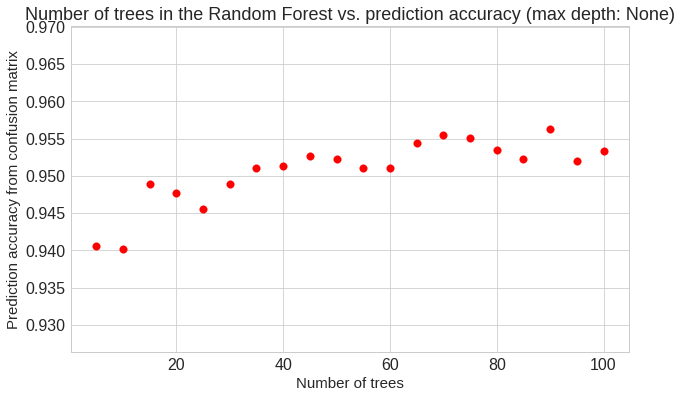

In [163]:
sns.plt.figure(figsize=(10,6))
sns.plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
sns.plt.title("Number of trees in the Random Forest vs. prediction accuracy (max depth: None)", fontsize=18)
sns.plt.xlabel("Number of trees", fontsize=15)
sns.plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)
sns.plt.show()

In [164]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=5,criterion='gini')
    rfc.fit(x_train0, y_train0)
    pred = rfc.predict(x_test0)
    cm = confusion_matrix(y_test0,pred)
    accuracy[i] = float(cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

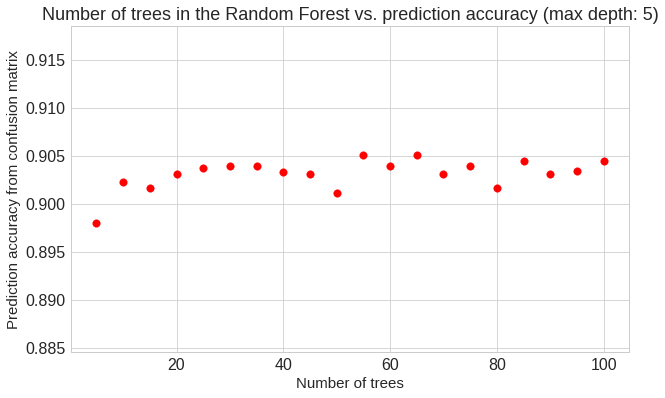

In [165]:
sns.plt.figure(figsize=(10,6))
sns.plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
sns.plt.title("Number of trees in the Random Forest vs. prediction accuracy (max depth: 5)", fontsize=18)
sns.plt.xlabel("Number of trees", fontsize=15)
sns.plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)
sns.plt.show()

Minimum sample split criteria

In [166]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=2,max_depth=None,criterion='gini')
    rfc.fit(x_train0, y_train0)
    pred = rfc.predict(x_test0)
    cm = confusion_matrix(y_test0,pred)
    accuracy[i] = float(cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

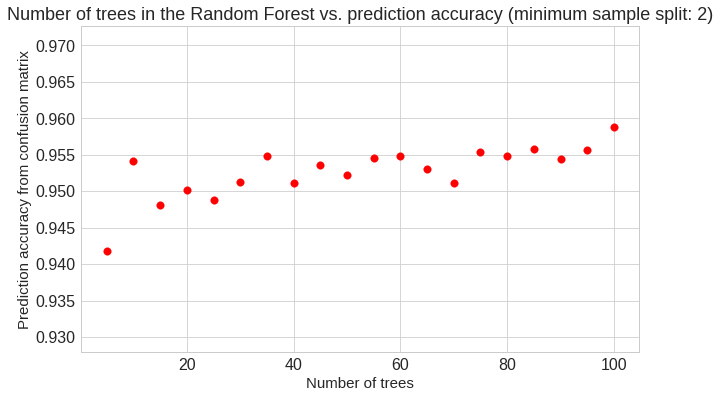

In [167]:

sns.plt.figure(figsize=(10,6))
sns.plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
sns.plt.title("Number of trees in the Random Forest vs. prediction accuracy (minimum sample split: 2)", fontsize=18)
sns.plt.xlabel("Number of trees", fontsize=15)
sns.plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)
sns.plt.show()

In [168]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=20,max_depth=None,criterion='gini')
    rfc.fit(x_train0, y_train0)
    pred = rfc.predict(x_test0)
    cm = confusion_matrix(y_test0,pred)
    accuracy[i] = float(cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

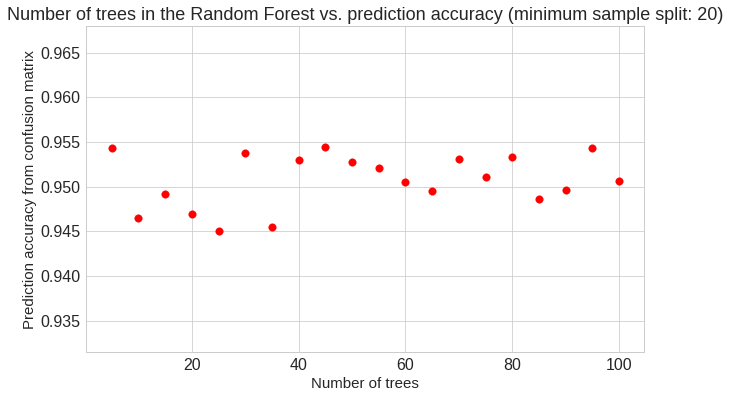

In [169]:
sns.plt.figure(figsize=(10,6))
sns.plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
sns.plt.title("Number of trees in the Random Forest vs. prediction accuracy (minimum sample split: 20)", fontsize=18)
sns.plt.xlabel("Number of trees", fontsize=15)
sns.plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)
sns.plt.show()

In [170]:
model_acy_rfc = []
model_acy_gnb = []
model_acy_knn = []
for i in range(50):
    if i % 10 == 0:
        print i,
    X0 = shuffle(X0)
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(X0[names], X0['rfi'], train_size=0.7)
    
    decision_tree_classifier = RandomForestClassifier(n_jobs=-1,random_state=4)
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_acy_rfc.append(classifier_accuracy)
    
    decision_tree_classifier = GaussianNB()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_acy_gnb.append(classifier_accuracy)
    
    decision_tree_classifier = KNeighborsClassifier(n_jobs=-1)
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_acy_knn.append(classifier_accuracy)

del training_inputs
del testing_inputs
del training_classes
del testing_classes
del classifier_accuracy
del decision_tree_classifier

0 10 20 30 40


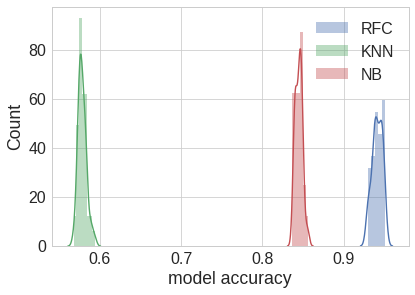

RFC: Mean 0.941471172962 	 std 0.00601763864754
KNN: Mean 0.57839297548 	 std 0.00503281604073
NB:  Mean 0.844960238569 	 std 0.00425797226609


In [171]:
sns.distplot(model_acy_rfc,label="RFC")
sns.distplot(model_acy_knn,label="KNN")
sns.distplot(model_acy_gnb, label="NB")
sns.plt.ylabel("Count")
sns.plt.xlabel("model accuracy")
sns.plt.legend(loc="best")
sns.plt.grid(True)
sns.plt.show()
print "RFC: Mean {0} \t std {1}".format(np.mean(model_acy_rfc),np.std(model_acy_rfc))
print "KNN: Mean {0} \t std {1}".format(np.mean(model_acy_knn),np.std(model_acy_knn))
print "NB:  Mean {0} \t std {1}".format(np.mean(model_acy_gnb),np.std(model_acy_gnb))


In [172]:
cv = StratifiedKFold(y=y_train0,shuffle=True,n_folds=10,random_state=0)

gnb = GaussianNB()

rfc = RandomForestClassifier(random_state=4)
grid = {'n_estimators': np.arange(1, 50)
        ,'criterion': ['gini', 'entropy']
        ,'max_features':['sqrt','log2']
        ,'max_depth':np.arange(1,50)
        ,'min_samples_split':np.arange(1,50)}
rfc = RandomizedSearchCV(rfc, grid, cv=cv,n_iter=30,random_state=10004)

knn = KNeighborsClassifier()
grid = {"n_neighbors": np.arange(1, 50, 2)
        ,"metric": ["euclidean", "minkowski"]}
knn = RandomizedSearchCV(knn, grid, cv=cv,n_iter=30,random_state=10004)

In [173]:
gnb.fit(x_train0,y_train0)

GaussianNB(priors=None)

In [174]:
rfc.fit(x_train0,y_train0)

RandomizedSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[0 0 ..., 0 0], n_folds=10, shuffle=True, random_state=0),
          error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=4,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=30, n_jobs=1,
          param_distributions={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), 'max_features': ['sqrt', 'log2'], 'min_sampl...27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42,

In [175]:
knn.fit(x_train0,y_train0)

RandomizedSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[0 0 ..., 0 0], n_folds=10, shuffle=True, random_state=0),
          error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params={}, iid=True, n_iter=30, n_jobs=1,
          param_distributions={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]), 'metric': ['euclidean', 'minkowski']},
          pre_dispatch='2*n_jobs', random_state=10004, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [176]:
y_pred_prob_gnb = gnb.predict_proba(x_test0)
y_pred_prob_rfc = rfc.predict_proba(x_test0)
y_pred_prob_knn = knn.predict_proba(x_test0)
y_pred_gnb = gnb.predict(x_test0)
y_pred_rfc = rfc.predict(x_test0)
y_pred_knn = knn.predict(x_test0)

In [177]:
report(rfc.cv_results_,"RFC")

Model with rank: 1
Mean validation score: 0.953 (std: 0.007)
Parameters: {'n_estimators': 39, 'min_samples_split': 15, 'criterion': 'gini', 'max_depth': 46, 'max_features': 'sqrt'}

Model with rank: 2
Mean validation score: 0.953 (std: 0.007)
Parameters: {'n_estimators': 36, 'min_samples_split': 6, 'criterion': 'gini', 'max_depth': 21, 'max_features': 'log2'}

Model with rank: 3
Mean validation score: 0.952 (std: 0.006)
Parameters: {'n_estimators': 48, 'min_samples_split': 21, 'criterion': 'gini', 'max_depth': 39, 'max_features': 'log2'}



In [178]:
report(knn.cv_results_,"KNN")

Model with rank: 1
Mean validation score: 0.582 (std: 0.007)
Parameters: {'n_neighbors': 11, 'metric': 'minkowski'}

Model with rank: 2
Mean validation score: 0.581 (std: 0.007)
Parameters: {'n_neighbors': 13, 'metric': 'minkowski'}

Model with rank: 2
Mean validation score: 0.581 (std: 0.007)
Parameters: {'n_neighbors': 13, 'metric': 'euclidean'}



In [179]:
rfc=rfc.best_estimator_
knn=knn.best_estimator_

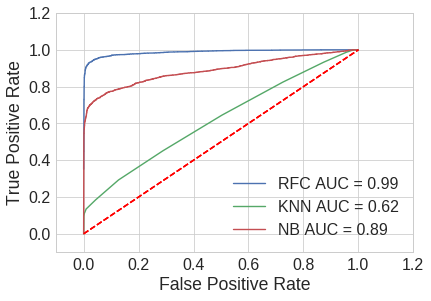

In [180]:
model_names =['RFC','KNN','NB']
roy_plot([y_pred_prob_rfc,y_pred_prob_knn,y_pred_prob_gnb],False,model_names)
sns.plt.grid(True)
sns.plt.show()

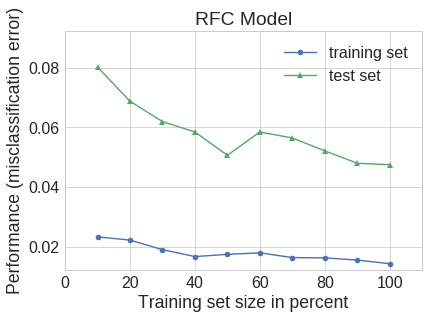

In [181]:
sns.plt.figure()
plot_learning_curves(x_train0.values, y_train0.values, x_test0.values, y_test0.values, rfc
                     ,print_model=False,style="seaborn-whitegrid")
sns.plt.title('RFC Model')
sns.plt.show()

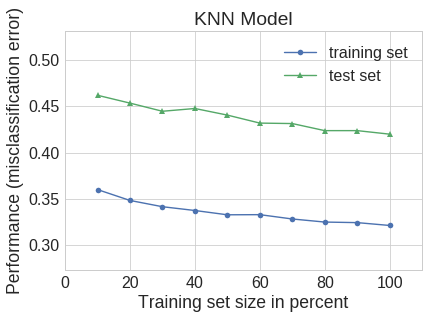

In [182]:
sns.plt.figure()
plot_learning_curves(x_train0.values, y_train0.values, x_test0.values, y_test0.values, knn
                     ,print_model=False,style="seaborn-whitegrid")
sns.plt.title('KNN Model')
sns.plt.show()

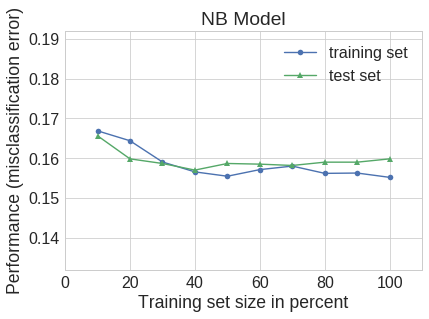

In [183]:
sns.plt.figure()
plot_learning_curves(x_train0.values, y_train0.values, x_test0.values, y_test0.values, gnb
                     ,print_model=False,style="seaborn-whitegrid")
sns.plt.title('NB Model')

sns.plt.show()

Classification Report for RFC
             precision    recall  f1-score   support

    Not RFI       0.92      0.98      0.95      2992
        RFI       0.98      0.92      0.95      3044

avg / total       0.95      0.95      0.95      6036


 The model is 95.245195 accurate


[[2945   47]
 [ 240 2804]]


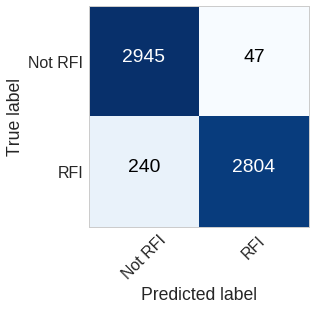

('Misclassification error rate:', 0.048)


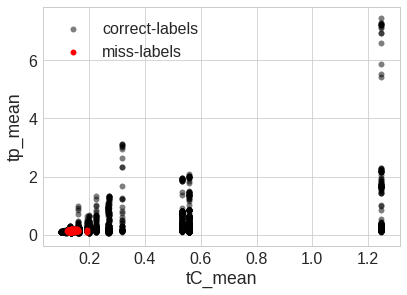

In [184]:
evaluate(y_pred_rfc,'RFC')
conf_mat=confusion_matrix(y_test0,y_pred_rfc)
print conf_mat
plot_confusion_matrix(conf_mat, classes=target_names,normalize=False)
sns.plt.show()
print("Misclassification error rate:",round(np.mean(y_pred_rfc!=y_test0),3))
sns.plt.figure()
sns.plt.scatter(x_test0[names[1]],x_test0[names[2]],c='k',alpha=0.5,label='correct-labels')
sns.plt.scatter(x_test0[names[1]].values[np.where(y_test0!=y_pred_rfc)[0]],x_test0[names[2]].values[np.where(y_test0!=y_pred_rfc)[0]],c='r',label='miss-labels')
sns.plt.xlabel(names[1])
sns.plt.ylabel(names[2])
sns.plt.legend(loc='best')
sns.plt.show()

Classification Report for KNN
             precision    recall  f1-score   support

    Not RFI       0.56      0.71      0.63      2992
        RFI       0.61      0.45      0.52      3044

avg / total       0.59      0.58      0.57      6036


 The model is 58.018555 accurate


[[2130  862]
 [1672 1372]]


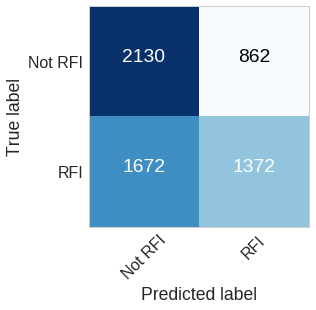

('Misclassification error rate:', 0.42)


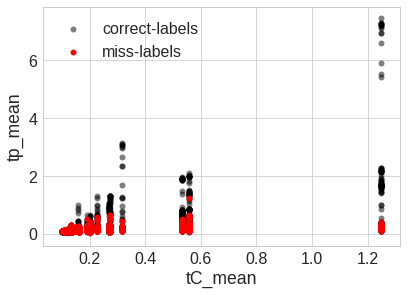

In [185]:
evaluate(y_pred_knn,'KNN')
conf_mat=confusion_matrix(y_test0,y_pred_knn)
print conf_mat
plot_confusion_matrix(conf_mat, classes=target_names,normalize=False)
sns.plt.show()
print("Misclassification error rate:",round(np.mean(y_pred_knn!=y_test0),3))
sns.plt.figure()
sns.plt.scatter(x_test0[names[1]],x_test0[names[2]],c='k',alpha=0.5,label='correct-labels')
sns.plt.scatter(x_test0[names[1]].values[np.where(y_test0!=y_pred_knn)[0]],x_test0[names[2]].values[np.where(y_test0!=y_pred_knn)[0]],c='r',label='miss-labels')
sns.plt.xlabel(names[1])
sns.plt.ylabel(names[2])
sns.plt.legend(loc='best')
sns.plt.show()

Classification Report for NB
             precision    recall  f1-score   support

    Not RFI       0.78      0.95      0.86      2992
        RFI       0.94      0.73      0.82      3044

avg / total       0.86      0.84      0.84      6036


 The model is 84.012591 accurate


[[2856  136]
 [ 829 2215]]


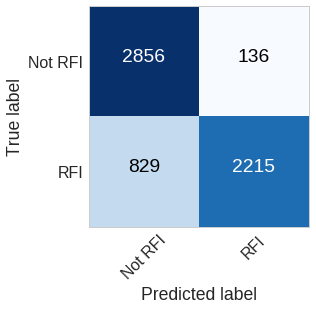

('Misclassification error rate:', 0.16)


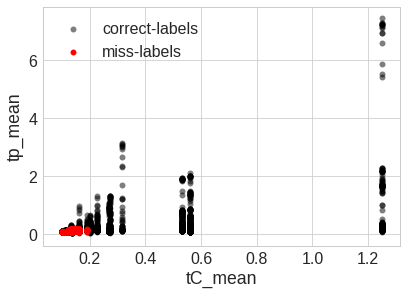

In [186]:
evaluate(y_pred_gnb,'NB')
conf_mat=confusion_matrix(y_test0,y_pred_gnb)
print conf_mat
plot_confusion_matrix(conf_mat, classes=target_names,normalize=False)
sns.plt.show()
print("Misclassification error rate:",round(np.mean(y_pred_gnb!=y_test0),3))
sns.plt.figure()
sns.plt.scatter(x_test0[names[1]],x_test0[names[2]],c='k',alpha=0.5,label='correct-labels')
sns.plt.scatter(x_test0[names[1]].values[np.where(y_test0!=y_pred_gnb)[0]],x_test0[names[2]].values[np.where(y_test0!=y_pred_gnb)[0]],c='r',label='miss-labels')
sns.plt.xlabel(names[1])
sns.plt.ylabel(names[2])
sns.plt.legend(loc='best')
sns.plt.show()

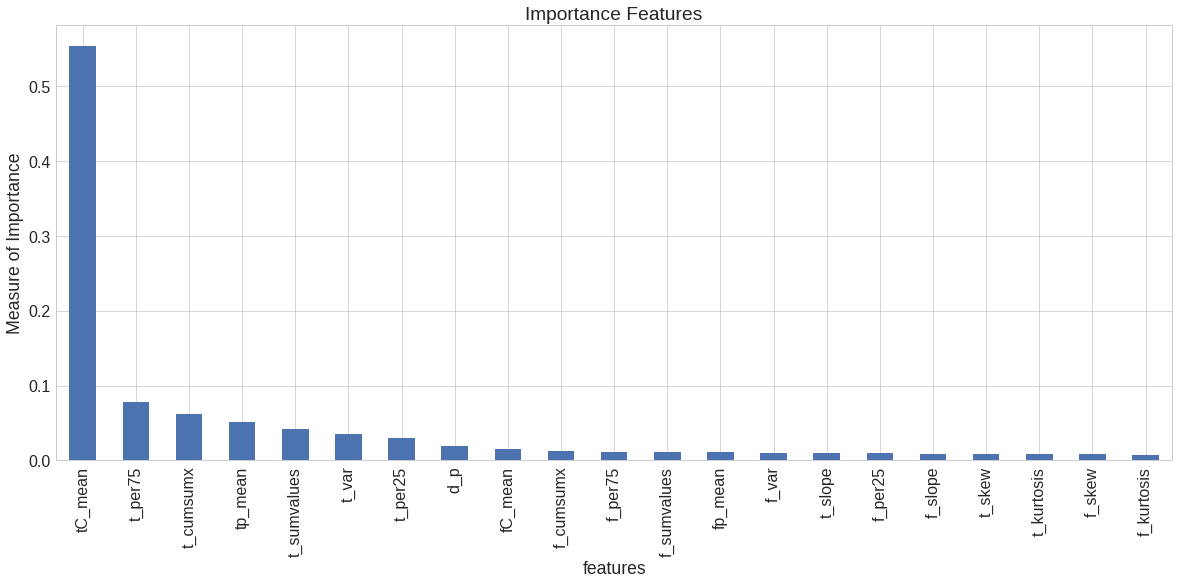

/usr/lib/python2.7/dist-packages/ipykernel/__main__.py:22: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [187]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

feature_space= []
# Print the feature ranking
impdf = []
for f in range(x_train0.shape[1]):
    feature_space.append(names[indices[f]])
    impdf.append({'features': names[indices[f]], 'importance': importances[indices[f]]})

impdf = pd.DataFrame(impdf)
impdf = impdf.sort_values(by='importance', ascending=False).reset_index(drop=True)
impdf['importance'] /= impdf['importance'].sum()
impdf.index = impdf['features']
sns.plt.figure()
impdf.plot(kind='bar', title='Importance Features', figsize=(20, 8),legend=False,fontsize=16.0)
sns.plt.ylabel("Measure of Importance")
sns.plt.grid(True)
sns.plt.show()
impdf = impdf.sort('importance')

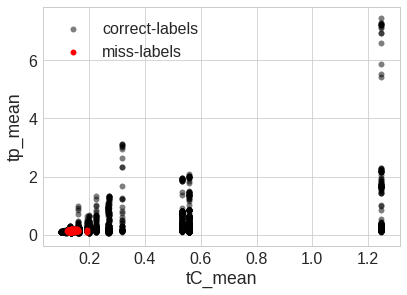

In [188]:
sns.plt.figure()
sns.plt.scatter(x_test0[names[1]],x_test0[names[2]],c='k',alpha=0.5,label='correct-labels')
sns.plt.scatter(x_test0[names[1]].values[np.where(y_test0!=y_pred_rfc)[0]],x_test0[names[2]].values[np.where(y_test0!=y_pred_rfc)[0]],c='r',label='miss-labels')
sns.plt.xlabel(names[1])
sns.plt.ylabel(names[2])
sns.plt.legend(loc='best')
sns.plt.show()

In [189]:
impdf[-6:]['features'].values

array(['t_var', 't_sumvalues', 'tp_mean', 't_cumsumx', 't_per75', 'tC_mean'], dtype=object)

In [190]:
model_acy_rfc = []
model_acy_gnb = []
model_acy_knn = []
for i in range(100):
    if i % 10 == 0:
        print i,
    X0 = shuffle(X0)
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(X0[impdf[-6:]['features'].values], X0['rfi'], train_size=0.7)
    
    decision_tree_classifier = RandomForestClassifier(n_jobs=-1,random_state=4)
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_acy_rfc.append(classifier_accuracy)
    
    decision_tree_classifier = GaussianNB()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_acy_gnb.append(classifier_accuracy)
    
    decision_tree_classifier = KNeighborsClassifier(n_jobs=-1)
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_acy_knn.append(classifier_accuracy)

del training_inputs
del testing_inputs
del training_classes
del testing_classes
del classifier_accuracy
del decision_tree_classifier

0 10 20 30 40 50 60 70 80 90


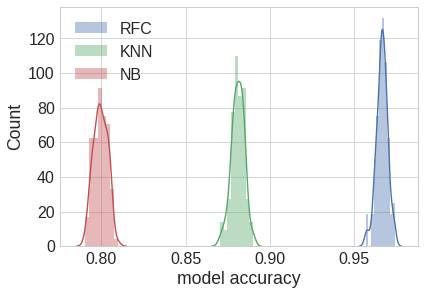

RFC: Mean 0.966396620278 	 std 0.00331088825553
KNN: Mean 0.880995692512 	 std 0.00377992881551
NB:  Mean 0.79960072896 	 std 0.00405352516241


In [191]:
sns.distplot(model_acy_rfc,label="RFC")
sns.distplot(model_acy_knn,label="KNN")
sns.distplot(model_acy_gnb, label="NB")
sns.plt.ylabel("Count")
sns.plt.xlabel("model accuracy")
sns.plt.legend(loc="best")
sns.plt.grid(True)
sns.plt.show()
print "RFC: Mean {0} \t std {1}".format(np.mean(model_acy_rfc),np.std(model_acy_rfc))
print "KNN: Mean {0} \t std {1}".format(np.mean(model_acy_knn),np.std(model_acy_knn))
print "NB:  Mean {0} \t std {1}".format(np.mean(model_acy_gnb),np.std(model_acy_gnb))

In [192]:
impdf[-3:]['features'].values

array(['t_cumsumx', 't_per75', 'tC_mean'], dtype=object)

In [193]:
model_acy_rfc = []
model_acy_gnb = []
model_acy_knn = []
for i in range(100):
    if i % 10 == 0:
        print i,
    X0 = shuffle(X0)
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(X0[impdf[-3:]['features'].values], X0['rfi'], train_size=0.7)
    
    decision_tree_classifier = RandomForestClassifier(n_jobs=-1,random_state=4)
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_acy_rfc.append(classifier_accuracy)
    
    decision_tree_classifier = GaussianNB()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_acy_gnb.append(classifier_accuracy)
    
    decision_tree_classifier = KNeighborsClassifier(n_jobs=-1)
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_acy_knn.append(classifier_accuracy)

del training_inputs
del testing_inputs
del training_classes
del testing_classes
del classifier_accuracy
del decision_tree_classifier

0 10 20 30 40 50 60 70 80 90


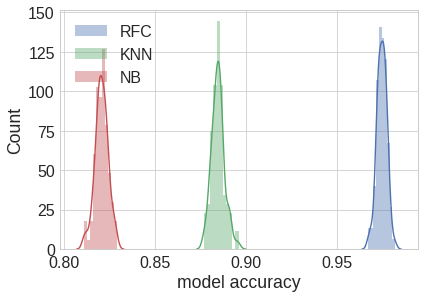

RFC: Mean 0.974807819748 	 std 0.0026733238807
KNN: Mean 0.884671968191 	 std 0.00352865436067
NB:  Mean 0.820596421471 	 std 0.0035885074286


In [194]:
sns.distplot(model_acy_rfc,label="RFC")
sns.distplot(model_acy_knn,label="KNN")
sns.distplot(model_acy_gnb, label="NB")
sns.plt.ylabel("Count")
sns.plt.xlabel("model accuracy")
sns.plt.legend(loc="best")
sns.plt.grid(True)
sns.plt.show()
print "RFC: Mean {0} \t std {1}".format(np.mean(model_acy_rfc),np.std(model_acy_rfc))
print "KNN: Mean {0} \t std {1}".format(np.mean(model_acy_knn),np.std(model_acy_knn))
print "NB:  Mean {0} \t std {1}".format(np.mean(model_acy_gnb),np.std(model_acy_gnb))

# feature Selection

In [195]:
score = fisher_score.fisher_score(x_train0, y_train0)

In [196]:
idx = fisher_score.feature_ranking(score)
print idx
print x_train0[idx[:5]].keys()
print impdf[-5:]['features'].values

[ 1  9  6  2  5  0  8 19 18 11 20 12 15 16 14 10 13  4 17  3  7]
Index([u'tC_mean', u't_per75', u't_sumvalues', u'tp_mean', u't_cumsumx'], dtype='object')
['t_sumvalues' 'tp_mean' 't_cumsumx' 't_per75' 'tC_mean']


In [197]:
model_acy_rfc = []
model_acy_gnb = []
model_acy_knn = []
for i in range(100):
    if i % 10 == 0:
        print i,
    X0 = shuffle(X0)
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(X0[idx[:5]], X0['rfi'], train_size=0.7)
    
    decision_tree_classifier = RandomForestClassifier(n_jobs=-1,random_state=4)
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_acy_rfc.append(classifier_accuracy)
    
    decision_tree_classifier = GaussianNB()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_acy_gnb.append(classifier_accuracy)
    
    decision_tree_classifier = KNeighborsClassifier(n_jobs=-1)
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_acy_knn.append(classifier_accuracy)

del training_inputs
del testing_inputs
del training_classes
del testing_classes
del classifier_accuracy
del decision_tree_classifier

0 10 20 30 40 50 60 70 80 90


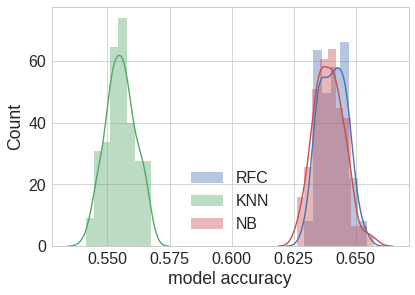

RFC: Mean 0.640864811133 	 std 0.00544625283279
KNN: Mean 0.555271703115 	 std 0.00579095309502
NB:  Mean 0.639264413519 	 std 0.00601453260732


In [198]:
sns.distplot(model_acy_rfc,label="RFC")
sns.distplot(model_acy_knn,label="KNN")
sns.distplot(model_acy_gnb, label="NB")
sns.plt.ylabel("Count")
sns.plt.xlabel("model accuracy")
sns.plt.legend(loc="best")
sns.plt.grid(True)
sns.plt.show()
print "RFC: Mean {0} \t std {1}".format(np.mean(model_acy_rfc),np.std(model_acy_rfc))
print "KNN: Mean {0} \t std {1}".format(np.mean(model_acy_knn),np.std(model_acy_knn))
print "NB:  Mean {0} \t std {1}".format(np.mean(model_acy_gnb),np.std(model_acy_gnb))

In [199]:
score = reliefF.reliefF(x_train0.values, y_train0.values)

In [200]:
idx = reliefF.feature_ranking(score)
print idx
print x_train0[idx[:5]].keys()
print impdf[-6:]['features'].values

[17 20  5  6 16 15  9  2  0  8  1 14 12 13 19 10 18 11  3  4  7]
Index([u'f_slope', u'f_var', u't_cumsumx', u't_sumvalues', u'f_sumvalues'], dtype='object')
['t_var' 't_sumvalues' 'tp_mean' 't_cumsumx' 't_per75' 'tC_mean']


In [201]:
model_acy_rfc = []
model_acy_gnb = []
model_acy_knn = []
for i in range(100):
    if i % 10 == 0:
        print i,
    X0 = shuffle(X0)
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(X0[idx[:5]], X0['rfi'], train_size=0.7)
    
    decision_tree_classifier = RandomForestClassifier(n_jobs=-1,random_state=4)
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_acy_rfc.append(classifier_accuracy)
    
    decision_tree_classifier = GaussianNB()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_acy_gnb.append(classifier_accuracy)
    
    decision_tree_classifier = KNeighborsClassifier(n_jobs=-1)
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_acy_knn.append(classifier_accuracy)

del training_inputs
del testing_inputs
del training_classes
del testing_classes
del classifier_accuracy
del decision_tree_classifier

0 10 20 30 40 50 60 70 80 90


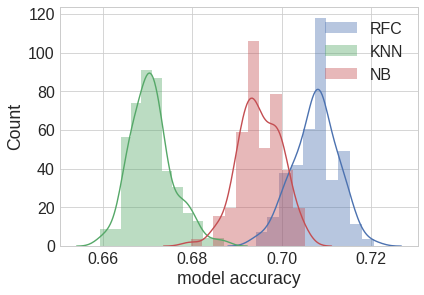

RFC: Mean 0.707453611663 	 std 0.00496292241422
KNN: Mean 0.670864811133 	 std 0.00489479051958
NB:  Mean 0.695023194168 	 std 0.00475302737852


In [202]:
sns.distplot(model_acy_rfc,label="RFC")
sns.distplot(model_acy_knn,label="KNN")
sns.distplot(model_acy_gnb, label="NB")
sns.plt.ylabel("Count")
sns.plt.xlabel("model accuracy")
sns.plt.legend(loc="best")
sns.plt.grid(True)
sns.plt.show()
print "RFC: Mean {0} \t std {1}".format(np.mean(model_acy_rfc),np.std(model_acy_rfc))
print "KNN: Mean {0} \t std {1}".format(np.mean(model_acy_knn),np.std(model_acy_knn))
print "NB:  Mean {0} \t std {1}".format(np.mean(model_acy_gnb),np.std(model_acy_gnb))

In [203]:
idx = CFS.cfs(x_train0.values, y_train0.values)

In [1]:
print idx
print x_train0[idx[:5]].keys()
print impdf[-5:]['features'].values

NameError: name 'idx' is not defined

In [205]:
model_acy_rfc = []
model_acy_gnb = []
model_acy_knn = []
for i in range(100):
    if i % 10 == 0:
        print i,
    X0 = shuffle(X0)
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(X0[idx[:5]], X0['rfi'], train_size=0.7)
    
    decision_tree_classifier = RandomForestClassifier(n_jobs=-1,random_state=4)
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_acy_rfc.append(classifier_accuracy)
    
    decision_tree_classifier = GaussianNB()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_acy_gnb.append(classifier_accuracy)
    
    decision_tree_classifier = KNeighborsClassifier(n_jobs=-1)
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_acy_knn.append(classifier_accuracy)

del training_inputs
del testing_inputs
del training_classes
del testing_classes
del classifier_accuracy
del decision_tree_classifier

0 10 20 30 40 50 60 70 80 90


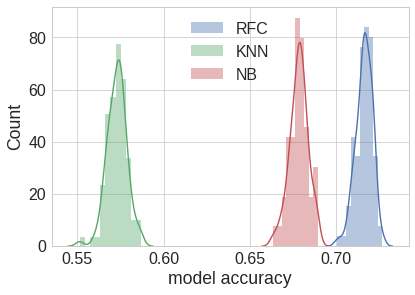

RFC: Mean 0.716096752816 	 std 0.00473983113974
KNN: Mean 0.57291749503 	 std 0.00568784109772
NB:  Mean 0.678281974818 	 std 0.00533521924497


In [206]:
sns.distplot(model_acy_rfc,label="RFC")
sns.distplot(model_acy_knn,label="KNN")
sns.distplot(model_acy_gnb, label="NB")
sns.plt.ylabel("Count")
sns.plt.xlabel("model accuracy")
sns.plt.legend(loc="best")
sns.plt.grid(True)
sns.plt.show()
print "RFC: Mean {0} \t std {1}".format(np.mean(model_acy_rfc),np.std(model_acy_rfc))
print "KNN: Mean {0} \t std {1}".format(np.mean(model_acy_knn),np.std(model_acy_knn))
print "NB:  Mean {0} \t std {1}".format(np.mean(model_acy_gnb),np.std(model_acy_gnb))

## Conclusion

To conclude on can see that the random forest classifier performs better than the KNN and the NB on all fronts.
One can see that all the features selection techniques that have been been used show that the feature importance obtained from the RFC show a better selection of the features than all the other features selection techniques used and as seen above the none of the selected features show any signs of overfitting. Moving forward the RFC is the best classifier to use for RFI detection.